In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [2]:
def rmse(predictor,target):
    return np.sqrt(((predictor - target) ** 2).mean())

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Check for any null values
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [7]:
#Fill the null values with 0

df.fillna(0, inplace= True)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
df = df.astype({'Product_Category_2': int, 'Product_Category_3': int})

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [11]:
#Mapping gender values
gender = {'F':0, 'M':1}

df['Gender'] = df['Gender'].map(gender)
df = df.rename(columns={'Gender': 'isMale'})

In [12]:
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [13]:
df.sort_values('Age', inplace=True)
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
48932,1001499,P00100442,1,0-17,10,C,1,0,2,4,5,13129
48933,1001499,P00255842,1,0-17,10,C,1,0,16,0,0,20195
48934,1001499,P00070342,1,0-17,10,C,1,0,1,2,14,15819
48935,1001499,P00275542,1,0-17,10,C,1,0,1,0,0,7587


In [14]:
df['Age'] = df['Age'].factorize()[0]

In [15]:
df.tail()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47161,1001252,P00357242,1,6,13,C,3,0,5,0,0,7134
47162,1001252,P00322942,1,6,13,C,3,0,2,8,16,16325
114629,1005686,P00101942,1,6,16,A,1,1,8,17,0,4056
188070,1005033,P00112342,0,6,13,C,1,1,13,16,0,936
132077,1002280,P00004142,1,6,6,B,2,1,8,17,0,7900


Mapping Age column to dummy values:

0-17: 0<br>
18-25: 1<br>
26-35: 2<br>
36-45: 3<br>

46-50: 4

51-55: 5

55+ : 6


In [16]:
city = {'A': 1, 'B': 2, 'C':3}

df['City_Category'] = df['City_Category'].map(city)

df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,1,2,0,3,0,0,8370
48932,1001499,P00100442,1,0,10,3,1,0,2,4,5,13129
48933,1001499,P00255842,1,0,10,3,1,0,16,0,0,20195
48934,1001499,P00070342,1,0,10,3,1,0,1,2,14,15819
48935,1001499,P00275542,1,0,10,3,1,0,1,0,0,7587


In [17]:
df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

In [18]:
df['Product_ID'] = df['Product_ID'].str[1:] # Drop the first character ‘P’ from product id
df = df.astype({'Product_ID':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [19]:
train, test = train_test_split(df,test_size=0.3)

In [20]:
X = train.drop('Purchase',axis=1)
y = train.Purchase

In [21]:
np.asarray(X)

array([[1000352,   42542,       1, ...,       1,       5,       0],
       [1004736,   28042,       1, ...,       1,      16,       0],
       [1000871,  278642,       1, ...,       5,       0,       0],
       ...,
       [1002439,   42742,       1, ...,       5,      14,       0],
       [1000222,  365242,       1, ...,       5,       8,       0],
       [1001879,   54042,       1, ...,      18,       0,       0]])

In [22]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [23]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     6453.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:22:15   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385035   BIC:                         7.591e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -6567.0377   4331.416     -1.516      0.129   -1.51e+04    1922.408
User_ID                        0.0162      0.004      3.751      0.000       0.008       0.025
Product_ID                    -0.0028   7.36e-05    -37.954      0.000      -0.003      -0.003
isMale                       504.9976     17.409     29.008      0.000     470.876     539.119
Age                          111.7630      5.872     19.033      0.000     100.254     123.272
Occupation                     5.4823      1.154      4.750      0.000       3.220       7.744
City_Category                317.9679      9.882     32.177      0.000     298.600     337.336
Stay_In_Current_City_Years     2.6197      5.785      0.453      0.651      -8.719      13.958
Marital_Status               -52.0200     15.938     -3.264      0.001     -83.258     -20.782
Product_Category_1          -345.3098      2.055   -168.036      0.000    -349.338    -341.282
Product_Category_2            10.1759      1.208      8.423      0.000       7.808      12.544
Product_Category_3           138.3028      1.303    106.136      0.000     135.749     140.857
==============================================================================
Omnibus:                    39484.144   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54698.530
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       3.828   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sta_In_Current_City_Years has a p-value >= 0.05, so it will be dropped.

In [24]:
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
X.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
313866,1000352,42542,1,1,4,1,0,1,5,0
31046,1004736,28042,1,1,20,1,1,1,16,0
277930,1000871,278642,1,0,10,2,0,5,0,0
165560,1001586,119342,1,4,7,2,1,10,13,0
84799,1001117,3642,1,1,14,2,0,8,0,0


In [25]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7098.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:22:16   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385036   BIC:                         7.591e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -6504.2875   4329.194     -1.502      0.133    -1.5e+04    1980.804
User_ID                0.0161      0.004      3.739      0.000       0.008       0.025
Product_ID            -0.0028   7.36e-05    -37.956      0.000      -0.003      -0.003
isMale               505.0639     17.409     29.012      0.000     470.944     539.184
Age                  111.7490      5.872     19.031      0.000     100.240     123.258
Occupation             5.4963      1.154      4.764      0.000       3.235       7.758
City_Category        318.0608      9.880     32.194      0.000     298.697     337.425
Marital_Status       -52.1055     15.937     -3.270      0.001     -83.341     -20.870
Product_Category_1  -345.3115      2.055   -168.037      0.000    -349.339    -341.284
Product_Category_2    10.1767      1.208      8.424      0.000       7.809      12.544
Product_Category_3   138.3024      1.303    106.136      0.000     135.748     140.856
==============================================================================
Omnibus:                    39483.476   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            54697.388
Skew:                           0.825   Prob(JB):                         0.00
Kurtosis:                       3.828   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Human behavior is imprecise, so a lower R-squared may be OK so long as the independent variables are significant.

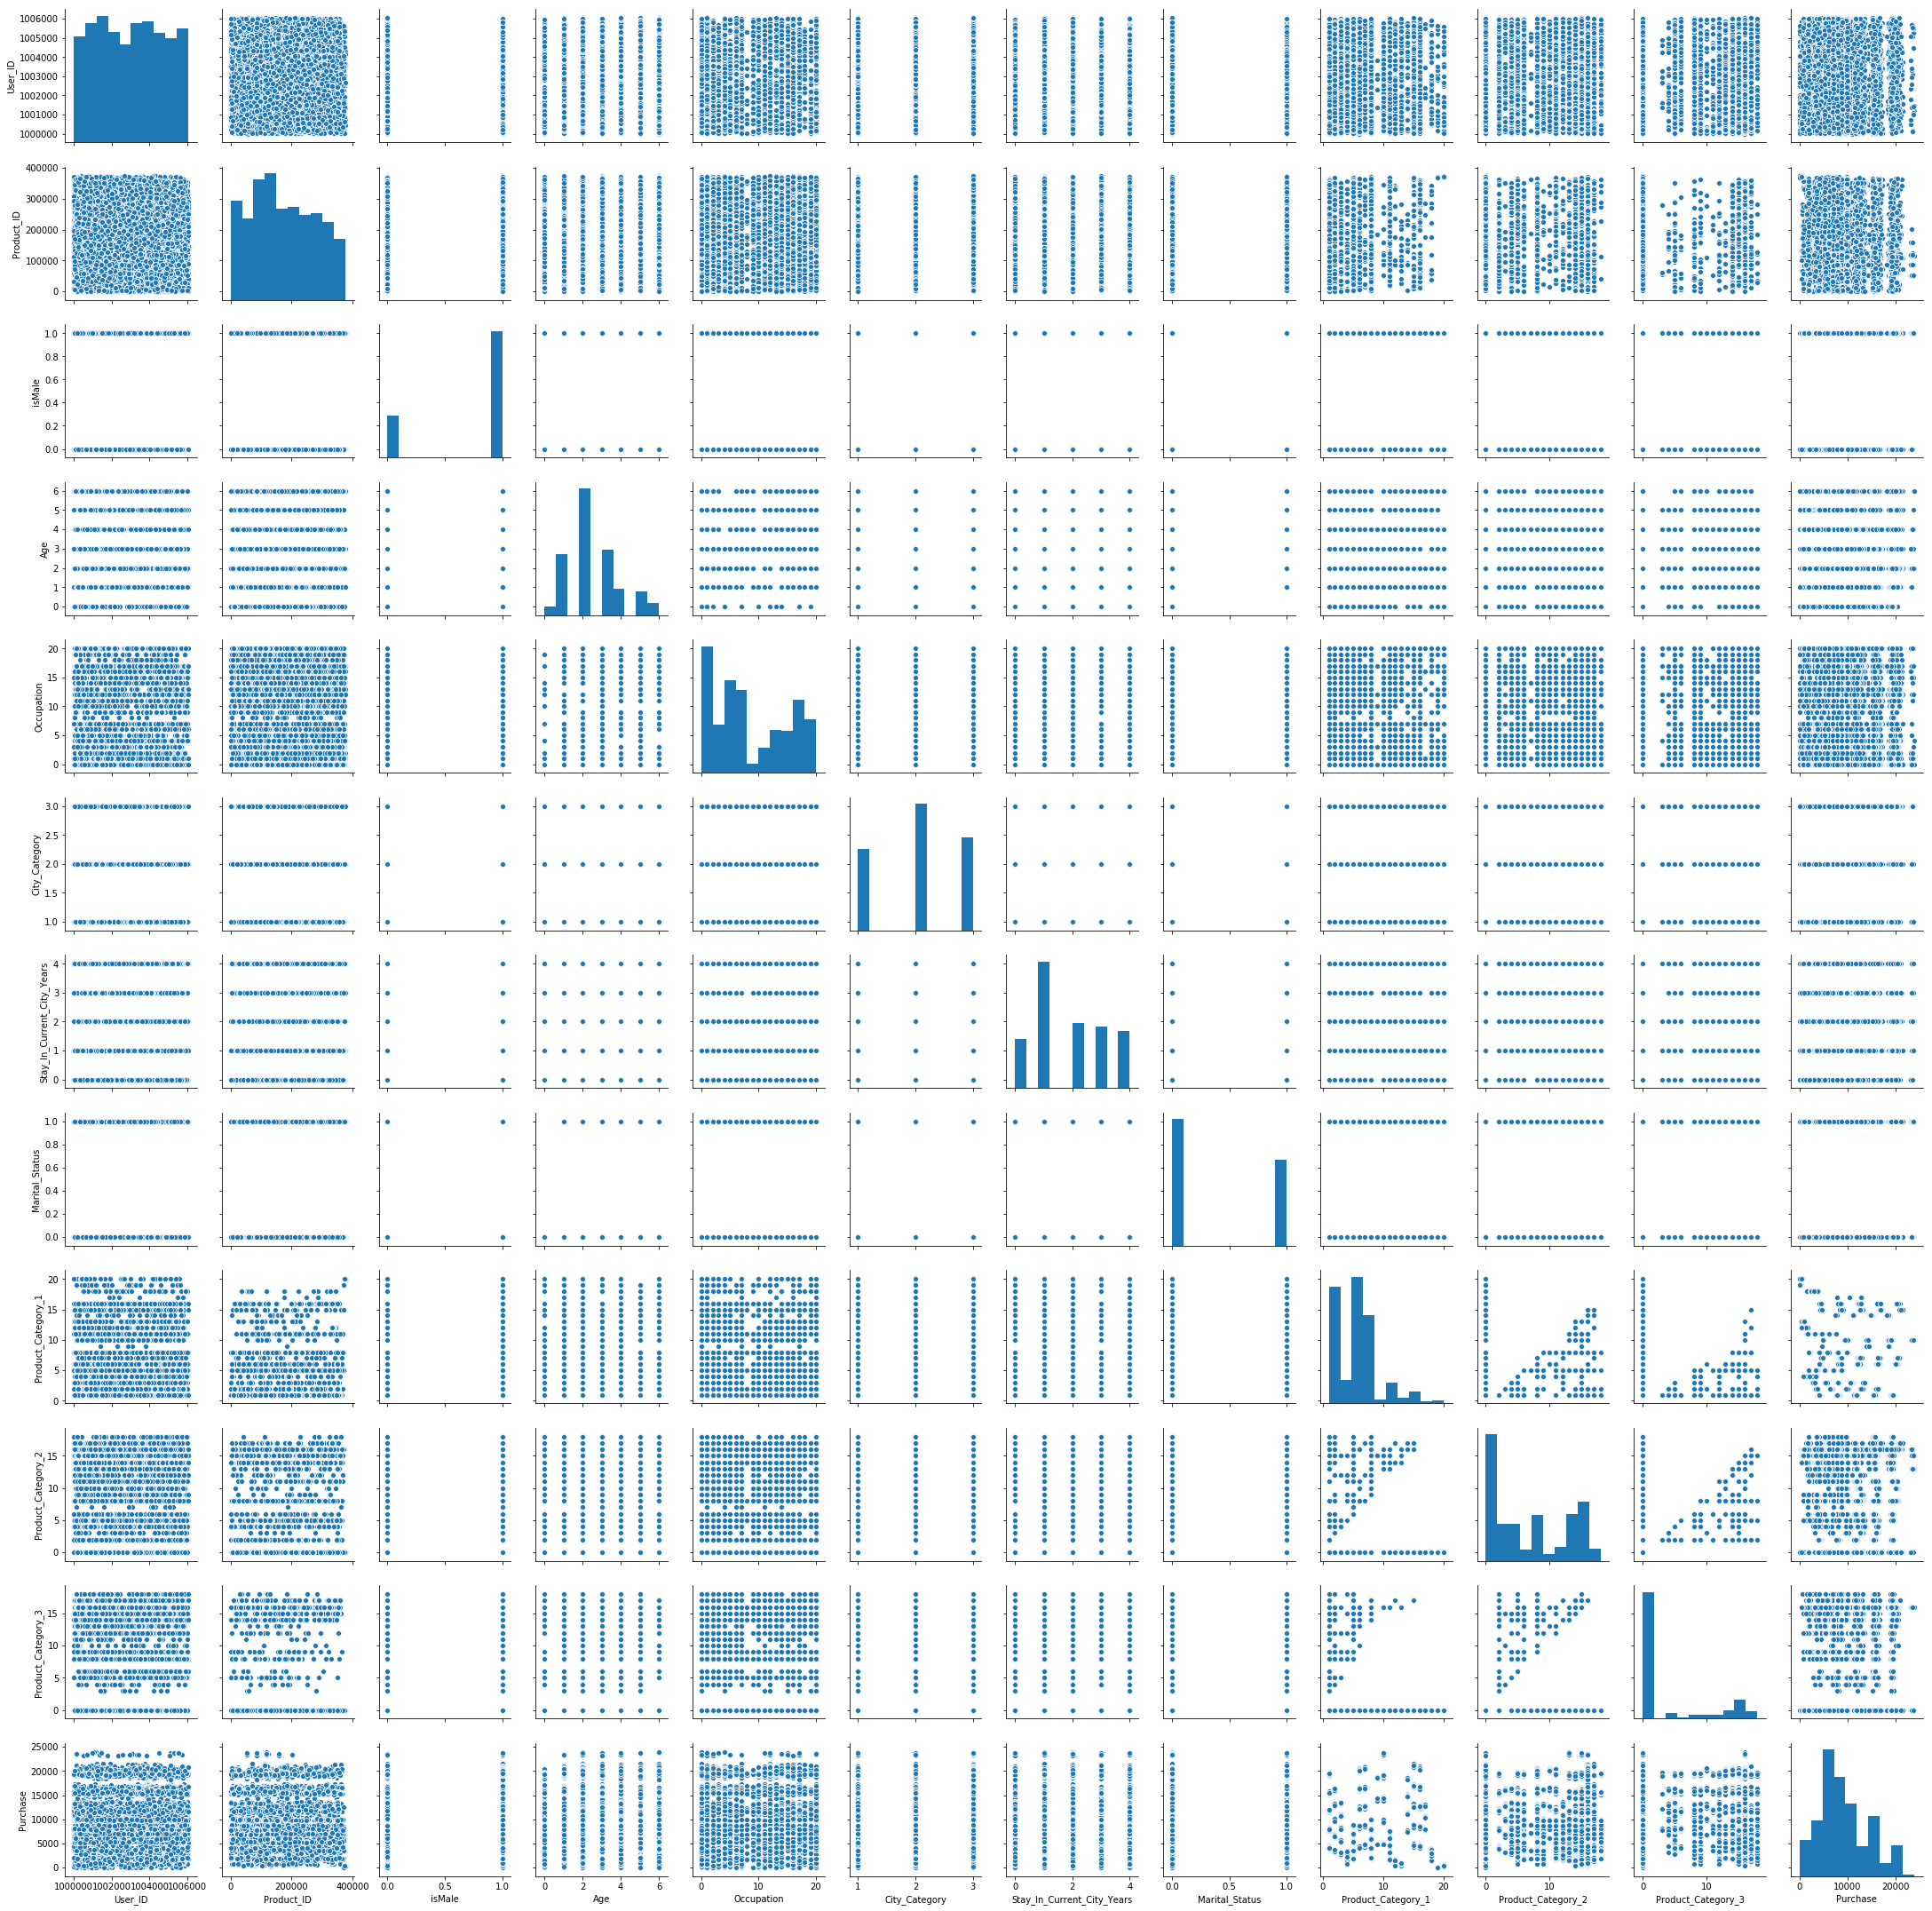

In [26]:
tempSlice = train.sample(n=10000) # Using a small slice to run a pairplot on - should give us an accurate idea of any relations while being efficient
sns.pairplot(tempSlice)

There appear to be relationships between the product categories.

In [27]:
prediction = multivar_model.predict(sm.add_constant(test.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)))

In [28]:
rmse(prediction,test['Purchase'])

4614.10168189882

Testing simple, single-var models

In [29]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    X = train[c]
    y = train.Purchase
    model = sm.OLS(y,sm.add_constant(X)).fit()
    print(c)
    print('Adjusted R-Squared: '+str(model.rsquared_adj))
    prediction = model.predict(sm.add_constant(test[c]))
    print('RMSE: '+str(rmse(prediction,test['Purchase'])))
    print('\n')

User_ID
Adjusted R-Squared: 3.756130772158972e-05
RMSE: 5017.341259394358


Product_ID
Adjusted R-Squared: 0.011020547537316627
RMSE: 4991.363778645352


isMale
Adjusted R-Squared: 0.0037443294379964076
RMSE: 5008.751364894998


Age
Adjusted R-Squared: 0.0002479090739749834
RMSE: 5016.638089350836


Occupation
Adjusted R-Squared: 0.0004018323610326391
RMSE: 5016.011487607677


City_Category
Adjusted R-Squared: 0.0037572788893753817
RMSE: 5007.213956659932


Marital_Status
Adjusted R-Squared: -1.7157170106862907e-06
RMSE: 5017.274895795563


Product_Category_1
Adjusted R-Squared: 0.11823051472393686
RMSE: 4712.239357120829


Product_Category_2
Adjusted R-Squared: 0.0028771764440930214
RMSE: 5011.280418640507


Product_Category_3
Adjusted R-Squared: 0.08334976733807586
RMSE: 4804.669100413409




Simple models do not beat the basic multivariate model on RMSE.

Testing individual parameter transformations in a multivariate model.

In [30]:
df.User_ID.eq(0).any()

False

In [31]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = df.copy()
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
        y = loopTrain.Purchase
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(loopTest.drop(['Purchase', 'Stay_In_Current_City_Years'],axis=1)))
        print('RMSE: '+str(rmse(prediction,loopTest['Purchase'])))
    print('\n')

User_ID
square
Adjusted R-Squared: 0.15356100542628914
RMSE: 4608.984304393471
sqrt
Adjusted R-Squared: 0.15583266049930844
RMSE: 4618.13337624385
log
Adjusted R-Squared: 0.15369982723599906
RMSE: 4607.049320443309


Product_ID
square
Adjusted R-Squared: 0.15501806238967897
RMSE: 4603.90373856138
sqrt
Adjusted R-Squared: 0.1530965212619252
RMSE: 4607.643984991197
log
Adjusted R-Squared: 0.1527356959727315
RMSE: 4614.825863568946


isMale
square
Adjusted R-Squared: 0.1558119360929009
RMSE: 4620.360109354346
sqrt
Adjusted R-Squared: 0.15517279326944478
RMSE: 4617.389284374457
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.154922486571482
RMSE: 4605.112454175433
sqrt
Adjusted R-Squared: 0.155719722837509
RMSE: 4626.9807250114045
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.1552504535690541
RMSE: 4614.168152920619
sqrt
Adjusted R-Squared: 0.15568300766510923
RMSE: 4609.278321772588
0 in Occupation, skipping


City_Category
square
Adjusted R-Squared: 0.156317347671

Certain transformations improve the RMSE, particularly log(Product_Category_1).

In [32]:
freq = np.unique(train.Purchase,return_counts = True)[1]
unique = np.unique(train.Purchase,return_counts = True)[0]

[]

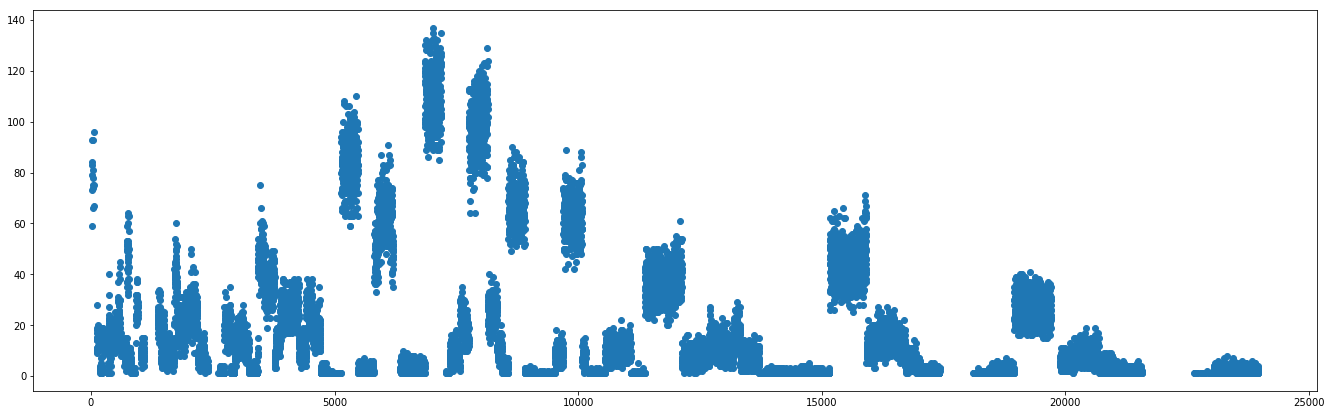

In [33]:
plt.figure(figsize=(23,7))
plt.scatter(unique,freq)
plt.plot()

Purchase numbers appear to be normally distributed until ~15000

In [34]:
lasso_model = LassoCV(alphas=np.logspace(-4,0,100),normalize=True,max_iter=100000,cv=5)
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
y = train.Purchase

In [35]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [36]:
lasso_predict = lasso_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [37]:
print(rmse(lasso_predict,test.Purchase))

4614.100570282923


In [38]:
ridge_model = RidgeCV(alphas=np.logspace(-5,0,100),normalize=True)

In [39]:
ridge_model.fit(X,y)
ridge_predict = ridge_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [40]:
print(rmse(ridge_predict,test.Purchase))

4614.100925168375


As per professor's suggestion, split on Purchase = 15000 (It's not exactly 15000, but close enough)

In [41]:
dfLow = df[(df.Purchase <= 15000)]
dfHigh = df[(df.Purchase > 15000)]

In [42]:
trainLow, testLow = train_test_split(dfLow,test_size=0.3)

In [43]:
Xlow = trainLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yLow = trainLow.Purchase

In [44]:
multivar_model = sm.OLS(yLow,sm.add_constant(Xlow)).fit()

In [45]:
predict = multivar_model.predict(sm.add_constant(testLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testLow.Purchase))

2867.6160914773864


In [46]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5275.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:23:19   Log-Likelihood:            -2.8861e+06
No. Observations:              307681   AIC:                         5.772e+06
Df Residuals:                  307670   BIC:                         5.772e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.304e+04   3006.898      4.337      0.000    7148.644    1.89e+04
User_ID               -0.0045      0.003     -1.512      0.130      -0.010       0.001
Product_ID            -0.0010   5.06e-05    -20.562      0.000      -0.001      -0.001
isMale                89.0639     11.882      7.496      0.000      65.776     112.352
Age                   99.7277      4.076     24.468      0.000      91.739     107.716
Occupation             1.0095      0.799      1.263      0.207      -0.557       2.576
City_Category        122.2193      6.878     17.769      0.000     108.738     135.700
Marital_Status       -32.4550     11.066     -2.933      0.003     -54.144     -10.766
Product_Category_1  -290.3698      1.516   -191.588      0.000    -293.340    -287.399
Product_Category_2    -9.9890      0.831    -12.022      0.000     -11.618      -8.360
Product_Category_3    45.1011      0.963     46.814      0.000      43.213      46.989
==============================================================================
Omnibus:                      178.035   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.587
Skew:                           0.053   Prob(JB):                     4.52e-39
Kurtosis:                       2.950   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
trainHigh, testHigh = train_test_split(dfHigh,test_size=0.3)


In [48]:
Xhigh = trainHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yHigh = trainHigh.Purchase

In [49]:
multivar_model_high = sm.OLS(yHigh,sm.add_constant(Xhigh)).fit()

In [50]:
predict = multivar_model_high.predict(sm.add_constant(testHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testHigh.Purchase))

1969.0220918053772


In [51]:
multivar_model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1180.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:23:19   Log-Likelihood:            -6.9673e+05
No. Observations:               77366   AIC:                         1.393e+06
Df Residuals:                   77355   BIC:                         1.394e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.137e+04   4121.181      5.186      0.000    1.33e+04    2.94e+04
User_ID               -0.0046      0.004     -1.114      0.265      -0.013       0.003
Product_ID            -0.0028   7.38e-05    -37.971      0.000      -0.003      -0.003
isMale                15.3836     18.135      0.848      0.396     -20.161      50.928
Age                    8.8090      5.590      1.576      0.115      -2.148      19.766
Occupation            -1.8219      1.117     -1.632      0.103      -4.010       0.367
City_Category         90.5715      9.409      9.626      0.000      72.129     109.014
Marital_Status        -3.5692     15.186     -0.235      0.814     -33.333      26.195
Product_Category_1   167.5785      1.753     95.607      0.000     164.143     171.014
Product_Category_2    34.6667      1.232     28.129      0.000      32.251      37.082
Product_Category_3     4.2071      1.096      3.840      0.000       2.060       6.354
==============================================================================
Omnibus:                    52392.969   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7691.027
Skew:                           0.509   Prob(JB):                         0.00
Kurtosis:                       1.838   Cond. No.                     5.90e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.9e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Feature engineered dataset.

In [74]:
new_df = pd.read_csv('../data/new_df.csv')

In [75]:
new_df.head()

,Unnamed: 0,User_ID_x,Product_ID_x,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,...,Max_purchase_price,Quantity_sold,Popular_item,Amount_user_spent,High_spender,User_category,Paid_more_avg,Num_Paid_more_avg,propHigh,luxury
0,0,1000001,P00069042,F,0-17,10,A,2,0,3,...,13716,227,0,334093,0,1,0,19,0.542857,0
1,1,1000017,P00069042,M,51-55,1,C,0,0,3,...,13716,227,0,1425995,0,5,1,85,0.739130,1
2,2,1000023,P00069042,M,36-45,0,B,3,1,3,...,13716,227,0,1670998,0,6,0,60,0.350877,0
3,3,1000030,P00069042,F,36-45,7,C,3,0,3,...,13716,227,0,261584,0,1,0,10,0.322581,0
4,4,1000073,P00069042,M,18-25,4,A,4+,0,3,...,13716,227,0,1428303,0,5,0,70,0.522388,0


In [76]:
new_df.fillna(0, inplace= True)

new_df = new_df.astype({'Product_Category_2': int, 'Product_Category_3': int})
#Mapping gender values
gender = {'F':0, 'M':1}

new_df['Gender'] = new_df['Gender'].map(gender)
new_df = new_df.rename(columns={'Gender': 'isMale'})

new_df.sort_values('Age', inplace=True)
new_df['Age'] = new_df['Age'].factorize()[0]

city = {'A': 1, 'B': 2, 'C':3}

new_df['City_Category'] = new_df['City_Category'].map(city)

new_df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

new_df['Product_ID_x'] = new_df['Product_ID_x'].str[1:] # Drop the first character ‘P’ from product id
new_df = new_df.astype({'Product_ID_x':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [78]:
new_df.drop(['Unnamed: 0','Mean_Purchase_price','Min_purchase_price','Max_purchase_price','Amount_user_spent','High_spender','Paid_more_avg','Num_Paid_more_avg','propHigh','luxury'],axis=1,inplace=True)

In [79]:
newTrain, newTest = train_test_split(new_df, test_size=0.3)

In [80]:
newTrain.columns

Index(['User_ID_x', 'Product_ID_x', 'isMale', 'Age', 'Occupation',
       'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase_price_x', 'User_prod_bought', 'Quantity_sold', 'Popular_item',
       'User_category'],
      dtype='object')

In [81]:
X = newTrain.drop('Purchase_price_x',axis=1)
y = newTrain.Purchase_price_x

In [82]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [83]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Purchase_price_x   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     6588.
Date:                Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                        21:26:25   Log-Likelihood:            -3.7836e+06
No. Observations:              385047   AIC:                         7.567e+06
Df Residuals:                  385031   BIC:                         7.567e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3144.5523   4204.309      0.748      0.454   -5095.767    1.14e+04
User_ID_x                      0.0048      0.004      1.134      0.257      -0.003       0.013
Product_ID_x                  -0.0015   7.19e-05    -21.395      0.000      -0.002      -0.001
isMale                       398.2324     17.070     23.329      0.000     364.775     431.690
Age                          141.5259      5.690     24.874      0.000     130.374     152.677
Occupation                     6.8480      1.122      6.103      0.000       4.649       9.047
City_Category                114.1305     11.270     10.127      0.000      92.042     136.219
Stay_In_Current_City_Years     5.2400      5.605      0.935      0.350      -5.745      16.225
Marital_Status               -13.2149     15.464     -0.855      0.393     -43.525      17.095
Product_Category_1          -307.7376      2.017   -152.570      0.000    -311.691    -303.784
Product_Category_2            -3.3240      1.174     -2.832      0.005      -5.624      -1.024
Product_Category_3           101.8600      1.289     79.048      0.000      99.334     104.386
User_prod_bought              -5.0635      0.094    -53.857      0.000      -5.248      -4.879
Quantity_sold                  3.5043      0.037     95.917      0.000       3.433       3.576
Popular_item                -523.2448     29.516    -17.728      0.000    -581.094    -465.395
User_category                293.7288      5.674     51.769      0.000     282.608     304.849
==============================================================================
Omnibus:                    40465.787   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57285.293
Skew:                           0.827   Prob(JB):                         0.00
Kurtosis:                       3.914   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [84]:
predict = multivar_model.predict(sm.add_constant(newTest.drop('Purchase_price_x',axis=1)))
print(rmse(predict,newTest.Purchase_price_x))

4486.210411639305


In [85]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [86]:
lasso_predict = lasso_model.predict(newTest.drop('Purchase_price_x',axis=1))
print(rmse(lasso_predict,newTest.Purchase_price_x))

4486.211636739283


In [64]:
df_reduced = new_df.copy()

Feature engineering has improved the RMSE slightly.

In [87]:
for c in new_df.columns:
    if (c == 'Purchase_price_x'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = new_df.copy()
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain.drop('Purchase_price_x',axis=1)
        y = loopTrain.Purchase_price_x
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(loopTest.drop('Purchase_price_x',axis=1)))
        print('RMSE: '+str(rmse(prediction,loopTest['Purchase_price_x'])))
    print('\n')

User_ID_x
square
Adjusted R-Squared: 0.20504214313832958
RMSE: 4491.5122444178905
sqrt
Adjusted R-Squared: 0.2032535693332902
RMSE: 4471.585751783849
log
Adjusted R-Squared: 0.2042337108431893
RMSE: 4480.583845077681


Product_ID_x
square
Adjusted R-Squared: 0.20371601372551984
RMSE: 4489.468047887328
sqrt
Adjusted R-Squared: 0.203052007558294
RMSE: 4479.207851365311
log
Adjusted R-Squared: 0.2040019645200053
RMSE: 4479.04242128583


isMale
square
Adjusted R-Squared: 0.20385549956533655
RMSE: 4485.347818876111
sqrt
Adjusted R-Squared: 0.2028250789152869
RMSE: 4475.129779910841
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.20282140489523026
RMSE: 4474.81668507517
sqrt
Adjusted R-Squared: 0.20463499028658083
RMSE: 4483.7663115173
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.20352213232138794
RMSE: 4467.6100991835265
sqrt
Adjusted R-Squared: 0.20337149889618789
RMSE: 4487.867467068427
0 in Occupation, skipping


City_Category
square
Adjusted R-Squared: 0.2046003

There are some individual transformations that improve the RMSE, particularly log(Product_Category_1)